## Predictive Analysis on Credit Card Defaults Based on Demographic Factors and Payment Behaviour

CIND 820 XJH W2024
Project by: Md Fahim Ferdous ID: 501232653

Supervisor: Dr. Ceni Babaoglu

2.0 Data Analysis Package Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

2.1 Data file loading

In [2]:
df2=pd.read_csv('/content/card_default_cleaned.csv')
df2


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29927,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29928,29997,150000,1,3,2,43,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29929,29998,30000,1,2,2,37,4,3,2,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29930,29999,80000,1,3,1,41,1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


2.2 Data Normalization

In [3]:
scaler = MinMaxScaler()
df2_scaled = scaler.fit_transform(df2)
df2_normalized = pd.DataFrame(df2_scaled, columns=df2.columns)



2.3 Data Balancing

In [4]:
features = ['LIMIT_BAL', 'AGE','EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3',
            'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

y = df2_normalized['default payment next month'].copy() #Target variable
X = df2_normalized[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Apply oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

df_train = X_train.join(y_train)
print(df_train['default payment next month'].value_counts())

df_majority = df_train[df_train['default payment next month'] == 0]

df_minority = df_train[df_train['default payment next month'] == 1]


from sklearn.utils import resample

df_minority_upsampled = resample(df_minority,replace=True, n_samples=18641,random_state=587)
# Combine majority class with upsampled minority class
df_upsampled= pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
print(df_upsampled['default payment next month'].value_counts())


#Apply downsample to minority class
df_majority_downsampled = resample(df_majority,replace=True, n_samples=5304,random_state=587)
# Combine minority class with downsampled majority class
df_downsampled= pd.concat([df_minority, df_majority_downsampled])
# Display new class counts
print(df_downsampled['default payment next month'].value_counts())

#So we have 2 dataset, Upsampled data creates synthetic data and downsampled data creates bias.




0.0    18641
1.0     5304
Name: default payment next month, dtype: int64
0.0    18641
1.0    18641
Name: default payment next month, dtype: int64
1.0    5304
0.0    5304
Name: default payment next month, dtype: int64


3.0 Data Analysis with three different models-upsampled dataframe

3.1 Decision Tree with upsampled dataframe

Accuracy: 0.8797103392785303
Precision: 0.8270109689213894
Recall: 0.962756052141527
Confusion Matrix:
[[2941  757]
 [ 140 3619]]
F1 Score: 0.8897357098955132


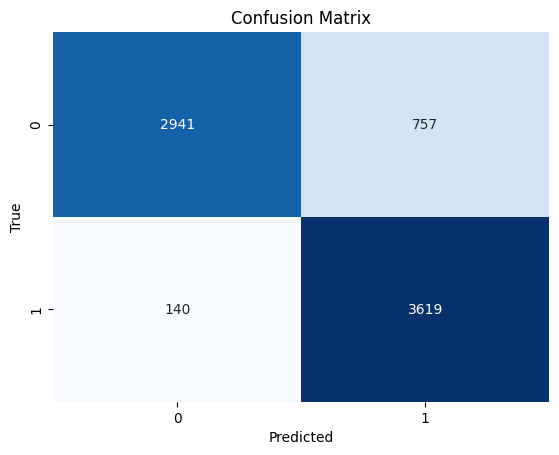

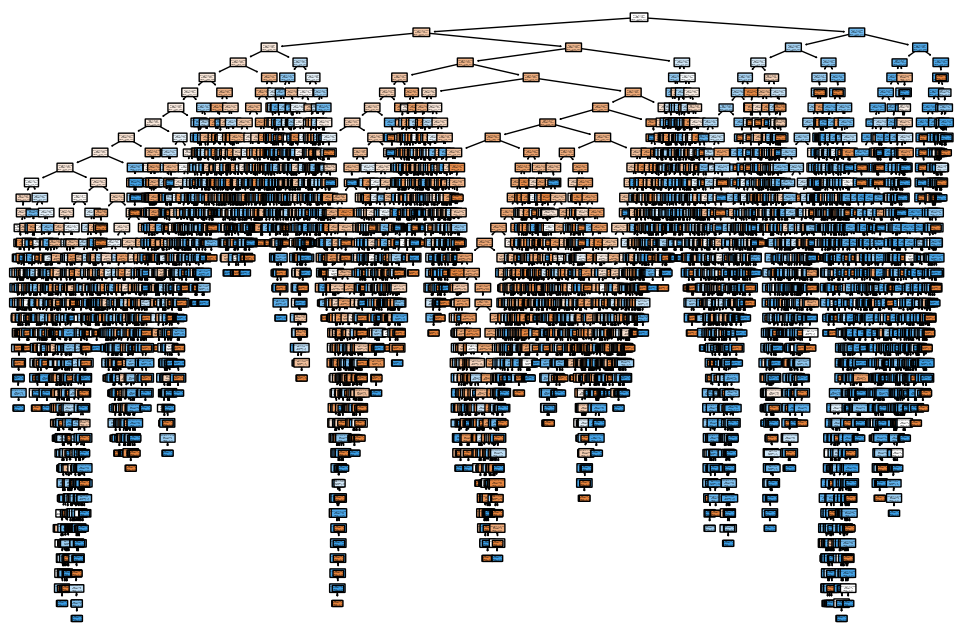

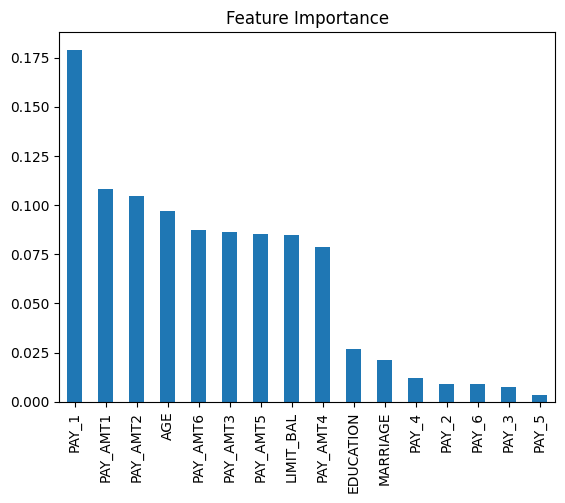

In [5]:
from sklearn.utils import resample

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import resample


# Separate features (X) and target variable (y)
X = df_upsampled.drop('default payment next month', axis=1)
y = df_upsampled['default payment next month']
model = DecisionTreeClassifier(random_state=42)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_conf_matrix = confusion_matrix(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("Confusion Matrix:")
print(dt_conf_matrix)
print("F1 Score:", dt_f1)

# Plot the confusion matrix using seaborn
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

# Visualize feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()

3.2 Support vector machine upsampled dataframe

Support Vector Machine Model:
Intercept (Bias): [-0.99990818]
Coefficients (Weights): [[-6.48081389e-05  3.02948150e-04 -1.80695898e-04 -1.02745900e-04
   7.99901578e+00  3.99778714e+00  1.49372777e-03  6.14769686e-05
   4.96749669e-04  9.91136434e-04 -4.73901913e-04 -1.20659041e-04
   3.06852381e-05  1.13459774e-04  4.03035260e-04 -7.04069566e-05]]
Support Vectors: [[1.21212121e-01 3.62068966e-01 3.33333333e-01 ... 6.37681159e-04
  9.28424562e-04 7.49055169e-04]
 [2.42424242e-01 9.31034483e-01 3.33333333e-01 ... 8.97262480e-03
  1.86153814e-03 2.23959929e-03]
 [2.02020202e-02 1.37931034e-01 3.33333333e-01 ... 0.00000000e+00
  1.94125136e-03 1.60990115e-02]
 ...
 [2.42424242e-01 3.27586207e-01 0.00000000e+00 ... 5.24959742e-04
  7.64309109e-04 6.16646427e-04]
 [6.76767677e-01 1.55172414e-01 0.00000000e+00 ... 1.18212560e-02
  3.82442929e-01 1.37459190e-02]
 [2.22222222e-01 8.44827586e-01 6.66666667e-01 ... 9.76811594e-03
  9.37802588e-03 9.45776729e-03]]
Classification Report:
        

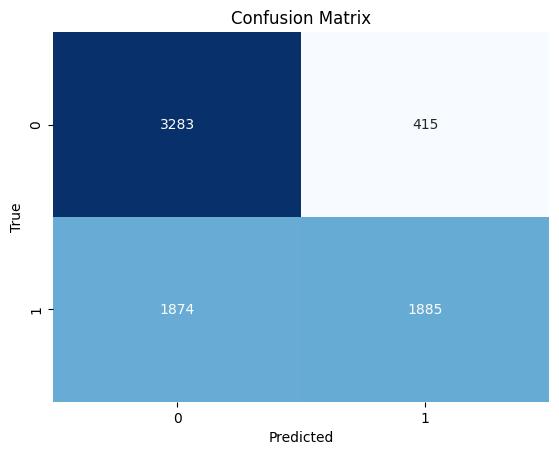


SVM Hyperparameters:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Support Vectors:
[[1.21212121e-01 3.62068966e-01 3.33333333e-01 ... 6.37681159e-04
  9.28424562e-04 7.49055169e-04]
 [2.42424242e-01 9.31034483e-01 3.33333333e-01 ... 8.97262480e-03
  1.86153814e-03 2.23959929e-03]
 [2.02020202e-02 1.37931034e-01 3.33333333e-01 ... 0.00000000e+00
  1.94125136e-03 1.60990115e-02]
 ...
 [2.42424242e-01 3.27586207e-01 0.00000000e+00 ... 5.24959742e-04
  7.64309109e-04 6.16646427e-04]
 [6.76767677e-01 1.55172414e-01 0.00000000e+00 ... 1.18212560e-02
  3.82442929e-01 1.37459190e-02]
 [2.22222222e-01 8.44827586e-01 6.66666667e-01 ... 9.76811594e-03
  9.37802588e-03 9.45776729e-03]]


In [6]:
# Create and fit an SVM model
model_SVM = SVC(kernel="linear", random_state=42)
model_SVM.fit(X_train, y_train)

# Make predictions on the test set
y_pred1 = model_SVM.predict(X_test)

# Print the trained SVM model parameters
print("Support Vector Machine Model:")
print("Intercept (Bias):", model_SVM.intercept_)
print("Coefficients (Weights):", model_SVM.coef_)
print("Support Vectors:", model_SVM.support_vectors_)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred1))


# Compute confusion matrix
SVM_conf_matrix = confusion_matrix(y_test, y_pred1)

# Calculate accuracy, precision, and recall
SVM_accuracy = accuracy_score(y_test, y_pred1)
SVM_precision = precision_score(y_test, y_pred1)
SVM_recall = recall_score(y_test, y_pred1)
SVM_f1 = f1_score(y_test, y_pred1)
# Print results
print("Confusion Matrix:")
print(SVM_conf_matrix)
print("\nAccuracy:", SVM_accuracy)
print("Precision:", SVM_precision)
print("Recall:", SVM_recall)
print("F1 Score:", SVM_f1)
# Plot the confusion matrix using seaborn
sns.heatmap(SVM_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Print hyperparameters and support vectors
print("\nSVM Hyperparameters:")
print(model_SVM.get_params())

# Print support vectors
print("\nSupport Vectors:")
print(model_SVM.support_vectors_)


3.3 Logistic regression upsampled dataframe

Optimization terminated successfully.
         Current function value: 0.580456
         Iterations 6
                               Logit Regression Results                               
Dep. Variable:     default payment next month   No. Observations:                29825
Model:                                  Logit   Df Residuals:                    29808
Method:                                   MLE   Df Model:                           16
Date:                        Mon, 01 Apr 2024   Pseudo R-squ.:                  0.1626
Time:                                01:20:07   Log-Likelihood:                -17312.
converged:                               True   LL-Null:                       -20673.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2946      0.043     -6.897 

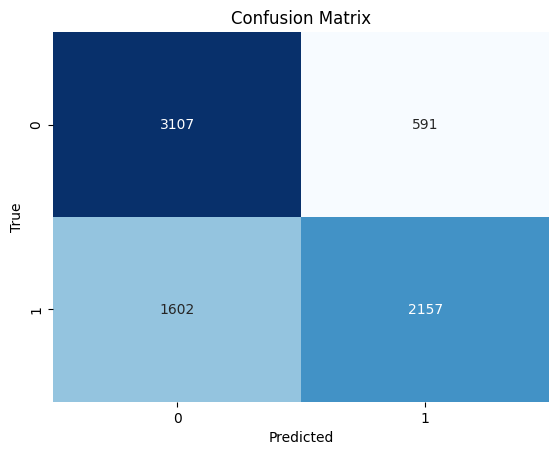

In [7]:
# Create and fit an Logistic regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred2 = model_lr.predict(X_test)

#Add a constant term to the features for intercept
X_train = sm.add_constant(X_train)

# Fit logistic regression model using statsmodels
logreg_model = sm.Logit(y_train, X_train)
result = logreg_model.fit()

# Display model summary
print(result.summary())

# Compute confusion matrix
lr_conf_matrix = confusion_matrix(y_test, y_pred2)

# Calculate accuracy, precision, and recall
lr_accuracy = accuracy_score(y_test, y_pred2)
lr_precision = precision_score(y_test, y_pred2)
lr_recall = recall_score(y_test, y_pred2)
lr_f1 = f1_score(y_test, y_pred2)
# Print results
print("Confusion Matrix:")
print(lr_conf_matrix)
print("\nAccuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)
# Plot the confusion matrix using seaborn
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



3.4 Comparison of the performance scores

In [8]:
comparison_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Decision Tree': [dt_accuracy, dt_precision, dt_recall, dt_f1],
    'SVM': [SVM_accuracy, SVM_precision, SVM_recall, SVM_f1],
    'Logistic Regression': [lr_accuracy, lr_precision, lr_recall, lr_f1]
})

# Display the comparison table
print(comparison_table)

      Metric  Decision Tree       SVM  Logistic Regression
0   Accuracy       0.879710  0.693040             0.705914
1  Precision       0.827011  0.819565             0.784934
2     Recall       0.962756  0.501463             0.573823
3   F1 Score       0.889736  0.622215             0.662978


4.0 Cross Validation

4.1 Decision Tree

Cross-Validation Metrics:
Accuracy: 0.7226
Precision: 0.3833
Recall: 0.4138
F1 Score: 0.3979


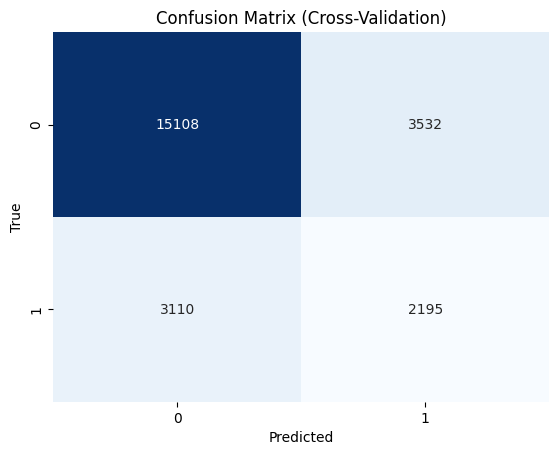


Test Set Metrics:
Accuracy: 0.7244
Precision: 0.3826
Recall: 0.3982
F1 Score: 0.3902


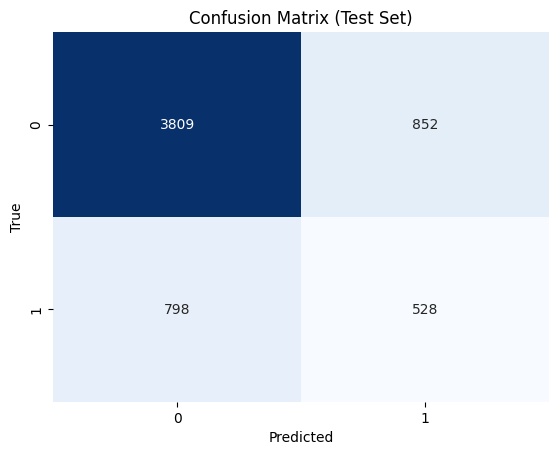

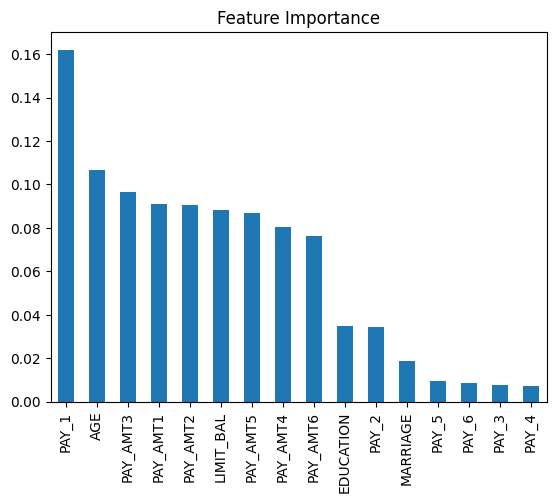

In [9]:
features = ['LIMIT_BAL', 'AGE','EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3',
            'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

y = df2['default payment next month'].copy() #Target variable
X = df2[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a Decision Tree model
dt_model_cv =DecisionTreeClassifier(random_state=42)

# Perform cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Make predictions using cross-validation
y_pred_cv = cross_val_predict(dt_model_cv, X_train, y_train, cv=stratified_kfold)

# Calculate metrics on the training set
accuracy_dt_cv = accuracy_score(y_train, y_pred_cv)
precision_dt_cv = precision_score(y_train, y_pred_cv)
recall_dt_cv = recall_score(y_train, y_pred_cv)
f1_dt_cv = f1_score(y_train, y_pred_cv)

# Print metrics
print("Cross-Validation Metrics:")
print(f"Accuracy: {accuracy_dt_cv:.4f}")
print(f"Precision: {precision_dt_cv:.4f}")
print(f"Recall: {recall_dt_cv:.4f}")
print(f"F1 Score: {f1_dt_cv:.4f}")

# Plot confusion matrix
conf_matrix_dt_cv = confusion_matrix(y_train, y_pred_cv)
sns.heatmap(conf_matrix_dt_cv, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Cross-Validation)')
plt.show()

# Train the model on the entire training set
dt_model_cv.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = dt_model_cv.predict(X_test)


# Calculate metrics on the test set
accuracy_test_dt_cv = accuracy_score(y_test, y_pred_test)
precision_test_dt_cv = precision_score(y_test, y_pred_test)
recall_test_dt_cv = recall_score(y_test, y_pred_test)
f1_test_dt_cv = f1_score(y_test, y_pred_test)

# Print test set metrics
print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy_test_dt_cv:.4f}")
print(f"Precision: {precision_test_dt_cv:.4f}")
print(f"Recall: {recall_test_dt_cv:.4f}")
print(f"F1 Score: {f1_test_dt_cv:.4f}")

# Plot confusion matrix for the test set
conf_matrix_test_dt_cv = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_test_dt_cv, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Visualize feature importance
feature_importance = pd.Series(dt_model_cv.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()



4.2 Support Vector Machine

Cross-Validation Metrics:
Accuracy: 0.7785
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


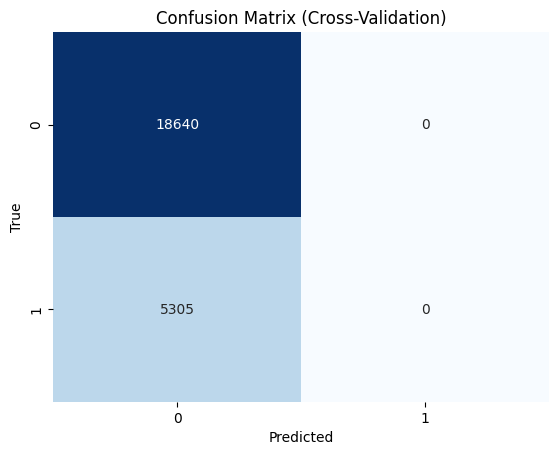


Test Set Metrics:
Accuracy: 0.7785
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


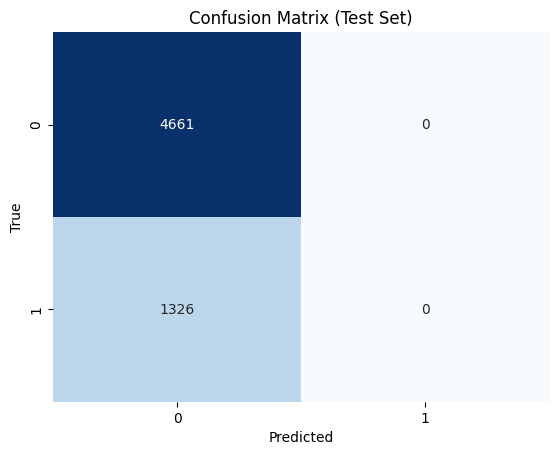

Cross-Validation Accuracy: 0.7784645214425218
[[3.0000e+04 3.6000e+01 3.0000e+00 ... 0.0000e+00 3.9000e+02 0.0000e+00]
 [9.0000e+04 2.7000e+01 1.0000e+00 ... 2.1000e+03 2.5000e+03 2.5000e+03]
 [4.0000e+05 3.2000e+01 2.0000e+00 ... 2.8170e+03 2.4100e+03 1.0715e+04]
 ...
 [9.0000e+04 2.7000e+01 2.0000e+00 ... 4.2000e+03 3.2850e+03 7.7870e+03]
 [6.0000e+04 2.7000e+01 1.0000e+00 ... 3.0000e+03 0.0000e+00 9.2300e+02]
 [1.1000e+05 4.3000e+01 3.0000e+00 ... 2.1000e+03 2.5000e+03 2.1000e+03]]
[-0.99988755 -0.99989221 -0.9998649  ... -1.00012788 -1.00005984
 -0.99999887]


In [10]:
# Create a Support vector machine
SVC_model_cv = SVC(random_state=42)

# Perform cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Make predictions using cross-validation
y_pred_cv1 = cross_val_predict(SVC_model_cv, X_train, y_train, cv=stratified_kfold)


# Calculate metrics on the training set
accuracy_svc_cv = accuracy_score(y_train, y_pred_cv1)
precision_svc_cv = precision_score(y_train, y_pred_cv1)
recall_svc_cv = recall_score(y_train, y_pred_cv1)
f1_svc_cv = f1_score(y_train, y_pred_cv1)

# Print metrics
print("Cross-Validation Metrics:")
print(f"Accuracy: {accuracy_svc_cv:.4f}")
print(f"Precision: {precision_svc_cv:.4f}")
print(f"Recall: {recall_svc_cv:.4f}")
print(f"F1 Score: {f1_svc_cv:.4f}")

# Plot confusion matrix
conf_matrix_svc_cv = confusion_matrix(y_train, y_pred_cv1)
sns.heatmap(conf_matrix_svc_cv, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Cross-Validation)')
plt.show()

# Train the model on the entire training set and make predictions on the test set
SVC_model_cv.fit(X_train, y_train)
y_pred_test1 = SVC_model_cv.predict(X_test)

# Calculate metrics on the test set
accuracy_test_svc_cv = accuracy_score(y_test, y_pred_test1)
precision_test_svc_cv = precision_score(y_test, y_pred_test1)
recall_test_svc_cv = recall_score(y_test, y_pred_test1)
f1_test_svc_cv = f1_score(y_test, y_pred_test1)

# Print test set metrics
print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy_test_svc_cv:.4f}")
print(f"Precision: {precision_test_svc_cv:.4f}")
print(f"Recall: {recall_test_svc_cv:.4f}")
print(f"F1 Score: {f1_test_svc_cv:.4f}")

# Plot confusion matrix for the test set
conf_matrix_test_svc_cv = confusion_matrix(y_test, y_pred_test1)
sns.heatmap(conf_matrix_test_svc_cv, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()


from sklearn.model_selection import cross_val_score

cross_val_results = cross_val_score(SVC_model_cv, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cross_val_results.mean())

# print the support vectors
support_vectors = SVC_model_cv.support_vectors_
print(support_vectors)

decision_function_values = SVC_model_cv.decision_function(X_test)
print(decision_function_values)

4.3 Logistic Regression

Optimization terminated successfully.
         Current function value: 0.447364
         Iterations 7
                               Logit Regression Results                               
Dep. Variable:     default payment next month   No. Observations:                23945
Model:                                  Logit   Df Residuals:                    23929
Method:                                   MLE   Df Model:                           15
Date:                        Mon, 01 Apr 2024   Pseudo R-squ.:                  0.1541
Time:                                01:23:53   Log-Likelihood:                -10712.
converged:                               True   LL-Null:                       -12664.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LIMIT_BAL  -2.028e-06   1.66e-07    -12.183 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


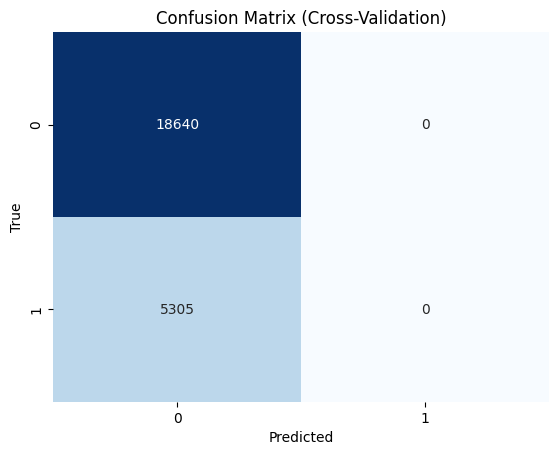


Test Set Metrics:
Accuracy: 0.7785
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


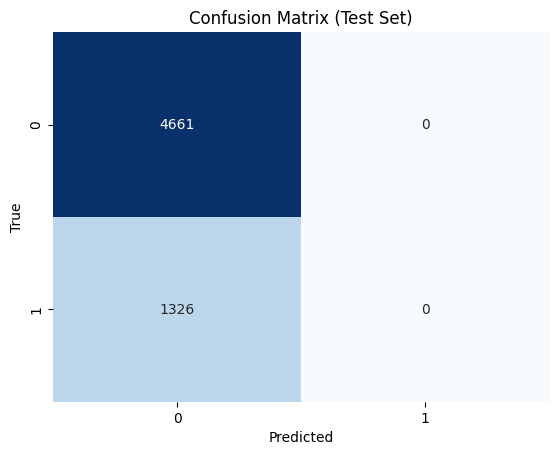

Intercept: -0.0004990689904387993

Coefficients:
LIMIT_BAL: -3.069904502567385e-06
AGE: -0.015470214738253375
EDUCATION: -0.0010522746236963586
MARRIAGE: -0.0009097916282728683
PAY_1: 0.0010475253515071818
PAY_2: 0.0008114965405403287
PAY_3: 0.0006827270724640356
PAY_4: 0.0006384821235095486
PAY_5: 0.0005880232009422978
PAY_6: 0.0005469623859297884
PAY_AMT1: -1.6296646832112518e-05
PAY_AMT2: -1.396030263981313e-05
PAY_AMT3: -6.903985615612971e-06
PAY_AMT4: -4.782385998522268e-06
PAY_AMT5: -4.206685515622694e-06
PAY_AMT6: -2.0412890855858295e-06


In [11]:
# Create a Logistic regression
lr_model_cv = LogisticRegression(random_state=42)

# Perform cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Make predictions using cross-validation
y_pred_cv2 = cross_val_predict(lr_model_cv, X_train, y_train, cv=stratified_kfold)

# Fit logistic regression model using statsmodels
logreg_model = sm.Logit(y_train, X_train)
result = logreg_model.fit()

# Display model summary
print(result.summary())


# Calculate metrics on the training set
accuracy_lr_cv = accuracy_score(y_train, y_pred_cv2)
precision_lr_cv = precision_score(y_train, y_pred_cv2)
recall_lr_cv = recall_score(y_train, y_pred_cv2)
f1_lr_cv = f1_score(y_train, y_pred_cv2)

# Print metrics
print("Cross-Validation Metrics:")
print(f"Accuracy: {accuracy_lr_cv:.4f}")
print(f"Precision: {precision_lr_cv:.4f}")
print(f"Recall: {recall_lr_cv:.4f}")
print(f"F1 Score: {f1_lr_cv:.4f}")

# Plot confusion matrix
conf_matrix_lr_cv = confusion_matrix(y_train, y_pred_cv2)
sns.heatmap(conf_matrix_lr_cv, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Cross-Validation)')
plt.show()

# Train the model on the entire training set and make predictions on the test set
lr_model_cv.fit(X_train, y_train)
y_pred_test2 = lr_model_cv.predict(X_test)

# Calculate metrics on the test set
accuracy_test_lr_cv = accuracy_score(y_test, y_pred_test2)
precision_test_lr_cv = precision_score(y_test, y_pred_test2)
recall_test_lr_cv = recall_score(y_test, y_pred_test2)
f1_test_lr_cv = f1_score(y_test, y_pred_test2)

# Print test set metrics
print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy_test_lr_cv:.4f}")
print(f"Precision: {precision_test_lr_cv:.4f}")
print(f"Recall: {recall_test_lr_cv:.4f}")
print(f"F1 Score: {f1_test_lr_cv:.4f}")

# Plot confusion matrix for the test set
conf_matrix_test_lr_cv = confusion_matrix(y_test, y_pred_test2)
sns.heatmap(conf_matrix_test_lr_cv, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Get the coefficients (factors) and intercept
coefficients = lr_model_cv.coef_[0]
intercept = lr_model_cv.intercept_[0]

# Display the coefficients and intercept
print("Intercept:", intercept)
print("\nCoefficients:")
for feature, coefficient in zip(X.columns, coefficients):
    print(f"{feature}: {coefficient}")

4.4 Comparison of models based on Train set and test set

In [12]:
comparison_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Decision Tree': [accuracy_dt_cv, precision_dt_cv, recall_dt_cv, f1_dt_cv],
    'SVM': [accuracy_svc_cv, precision_svc_cv, recall_svc_cv, f1_svc_cv],
    'Logistic Regression': [accuracy_lr_cv, precision_lr_cv, recall_lr_cv, f1_lr_cv]
})

# Display the comparison table
print(comparison_table)


comparison_table1= pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Decision Tree': [accuracy_test_dt_cv, precision_test_dt_cv, recall_test_dt_cv, f1_test_dt_cv],
    'SVM': [accuracy_test_svc_cv, precision_test_svc_cv, recall_test_svc_cv, f1_test_svc_cv],
    'Logistic Regression': [accuracy_test_lr_cv, precision_test_lr_cv, recall_test_lr_cv, f1_test_lr_cv]
})

# Display the comparison table
print(comparison_table1)




      Metric  Decision Tree       SVM  Logistic Regression
0   Accuracy       0.722614  0.778451             0.778451
1  Precision       0.383272  0.000000             0.000000
2     Recall       0.413761  0.000000             0.000000
3   F1 Score       0.397933  0.000000             0.000000
      Metric  Decision Tree      SVM  Logistic Regression
0   Accuracy       0.724403  0.77852              0.77852
1  Precision       0.382609  0.00000              0.00000
2     Recall       0.398190  0.00000              0.00000
3   F1 Score       0.390244  0.00000              0.00000


4.5 K fold stratified cross validation with normalized data

4.5.1 Decision Tree

Cross-Validation Metrics:
Accuracy: 0.7224
Precision: 0.3831
Recall: 0.4141
F1 Score: 0.3980


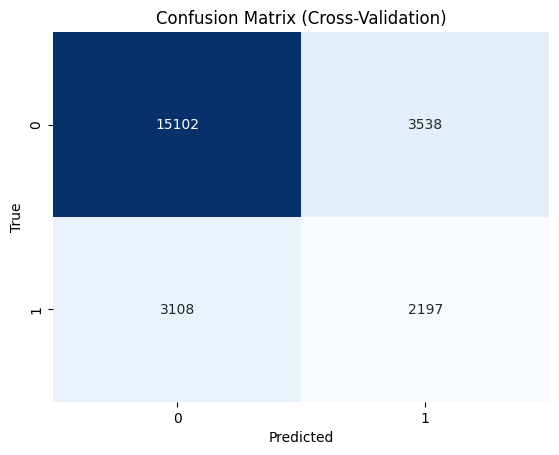


Test Set Metrics:
Accuracy: 0.7247
Precision: 0.3833
Recall: 0.3989
F1 Score: 0.3910


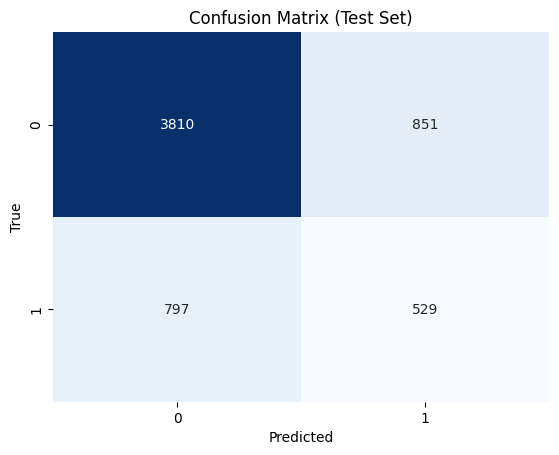

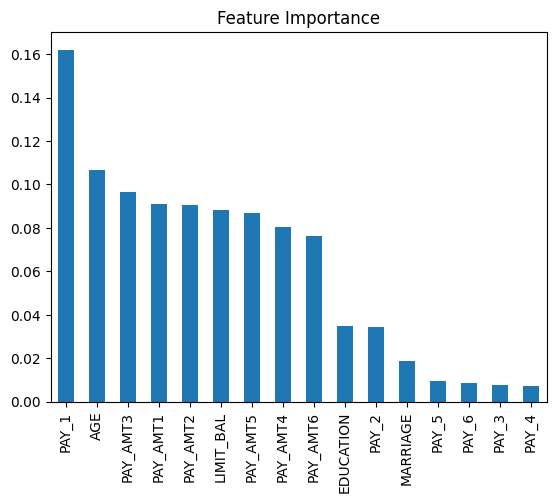

In [13]:
features = ['LIMIT_BAL', 'AGE','EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3',
            'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

y = df2_normalized['default payment next month'].copy() #Target variable
X = df2_normalized[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a Decision Tree model
dt_model_cv =DecisionTreeClassifier(random_state=42)

# Perform cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Make predictions using cross-validation
y_pred_cv = cross_val_predict(dt_model_cv, X_train, y_train, cv=stratified_kfold)

# Calculate metrics on the training set
accuracy_dt_cv = accuracy_score(y_train, y_pred_cv)
precision_dt_cv = precision_score(y_train, y_pred_cv)
recall_dt_cv = recall_score(y_train, y_pred_cv)
f1_dt_cv = f1_score(y_train, y_pred_cv)

# Print metrics
print("Cross-Validation Metrics:")
print(f"Accuracy: {accuracy_dt_cv:.4f}")
print(f"Precision: {precision_dt_cv:.4f}")
print(f"Recall: {recall_dt_cv:.4f}")
print(f"F1 Score: {f1_dt_cv:.4f}")

# Plot confusion matrix
conf_matrix_dt_cv = confusion_matrix(y_train, y_pred_cv)
sns.heatmap(conf_matrix_dt_cv, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Cross-Validation)')
plt.show()

# Train the model on the entire training set
dt_model_cv.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = dt_model_cv.predict(X_test)


# Calculate metrics on the test set
accuracy_test_dt_cv = accuracy_score(y_test, y_pred_test)
precision_test_dt_cv = precision_score(y_test, y_pred_test)
recall_test_dt_cv = recall_score(y_test, y_pred_test)
f1_test_dt_cv = f1_score(y_test, y_pred_test)

# Print test set metrics
print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy_test_dt_cv:.4f}")
print(f"Precision: {precision_test_dt_cv:.4f}")
print(f"Recall: {recall_test_dt_cv:.4f}")
print(f"F1 Score: {f1_test_dt_cv:.4f}")

# Plot confusion matrix for the test set
conf_matrix_test_dt_cv = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_test_dt_cv, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Visualize feature importance
feature_importance = pd.Series(dt_model_cv.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()

4.5.2 Support Vector Machine

Cross-Validation Metrics:
Accuracy: 0.8205
Precision: 0.6800
Recall: 0.3585
F1 Score: 0.4695


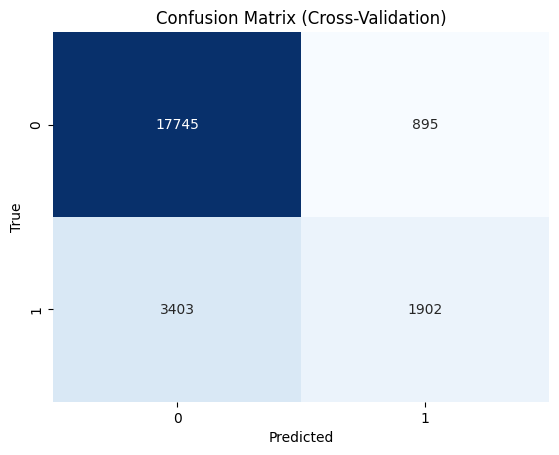


Test Set Metrics:
Accuracy: 0.8146
Precision: 0.6584
Recall: 0.3386
F1 Score: 0.4472


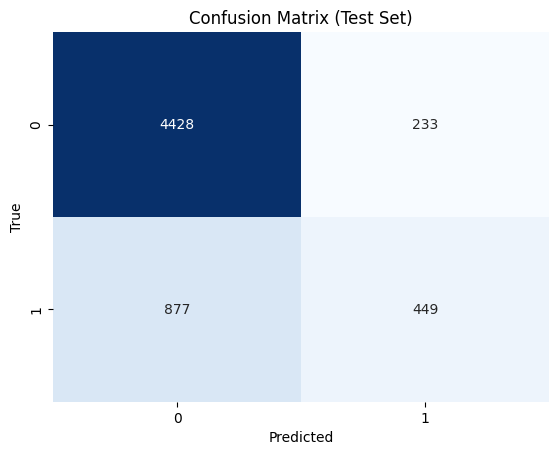

Cross-Validation Accuracy: 0.819792315357961
[[0.02020202 0.25862069 0.66666667 ... 0.         0.00091436 0.        ]
 [0.19191919 0.44827586 0.33333333 ... 0.00361353 0.15473743 0.0567466 ]
 [0.24242424 0.06896552 0.33333333 ... 0.00161031 0.         0.        ]
 ...
 [0.01010101 0.18965517 0.33333333 ... 0.0029066  0.00468901 0.00516016]
 [0.05050505 0.10344828 0.         ... 0.00483092 0.         0.0017459 ]
 [0.1010101  0.37931034 0.66666667 ... 0.00338164 0.00586127 0.00397226]]
[ 0.26084761 -0.9998826  -0.232992   ... -0.99506892  0.70666829
 -1.00014321]


In [14]:
# Create a Support vector machine
SVC_model_cv = SVC(random_state=42)

# Perform cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Make predictions using cross-validation
y_pred_cv1 = cross_val_predict(SVC_model_cv, X_train, y_train, cv=stratified_kfold)


# Calculate metrics on the training set
accuracy_svc_cv = accuracy_score(y_train, y_pred_cv1)
precision_svc_cv = precision_score(y_train, y_pred_cv1)
recall_svc_cv = recall_score(y_train, y_pred_cv1)
f1_svc_cv = f1_score(y_train, y_pred_cv1)

# Print metrics
print("Cross-Validation Metrics:")
print(f"Accuracy: {accuracy_svc_cv:.4f}")
print(f"Precision: {precision_svc_cv:.4f}")
print(f"Recall: {recall_svc_cv:.4f}")
print(f"F1 Score: {f1_svc_cv:.4f}")

# Plot confusion matrix
conf_matrix_svc_cv = confusion_matrix(y_train, y_pred_cv1)
sns.heatmap(conf_matrix_svc_cv, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Cross-Validation)')
plt.show()

# Train the model on the entire training set and make predictions on the test set
SVC_model_cv.fit(X_train, y_train)
y_pred_test1 = SVC_model_cv.predict(X_test)

# Calculate metrics on the test set
accuracy_test_svc_cv = accuracy_score(y_test, y_pred_test1)
precision_test_svc_cv = precision_score(y_test, y_pred_test1)
recall_test_svc_cv = recall_score(y_test, y_pred_test1)
f1_test_svc_cv = f1_score(y_test, y_pred_test1)

# Print test set metrics
print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy_test_svc_cv:.4f}")
print(f"Precision: {precision_test_svc_cv:.4f}")
print(f"Recall: {recall_test_svc_cv:.4f}")
print(f"F1 Score: {f1_test_svc_cv:.4f}")

# Plot confusion matrix for the test set
conf_matrix_test_svc_cv = confusion_matrix(y_test, y_pred_test1)
sns.heatmap(conf_matrix_test_svc_cv, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()


from sklearn.model_selection import cross_val_score

cross_val_results = cross_val_score(SVC_model_cv, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cross_val_results.mean())

# print the support vectors
support_vectors = SVC_model_cv.support_vectors_
print(support_vectors)

decision_function_values = SVC_model_cv.decision_function(X_test)
print(decision_function_values)

4.5.3 Logistic Regression

Optimization terminated successfully.
         Current function value: 0.458679
         Iterations 8
                               Logit Regression Results                               
Dep. Variable:     default payment next month   No. Observations:                23945
Model:                                  Logit   Df Residuals:                    23929
Method:                                   MLE   Df Model:                           15
Date:                        Mon, 01 Apr 2024   Pseudo R-squ.:                  0.1327
Time:                                01:35:15   Log-Likelihood:                -10983.
converged:                               True   LL-Null:                       -12664.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LIMIT_BAL     -3.3901      0.159    -21.324 

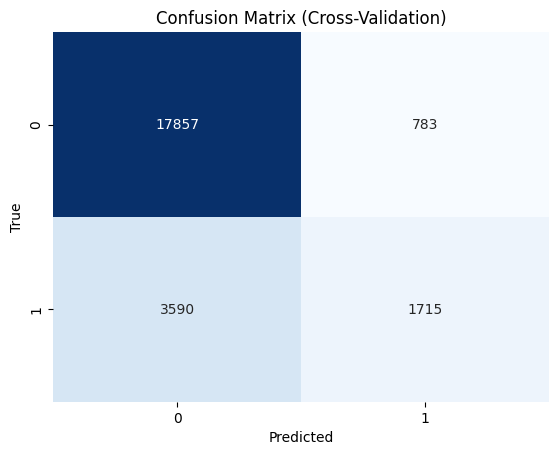


Test Set Metrics:
Accuracy: 0.8129
Precision: 0.6788
Recall: 0.2949
F1 Score: 0.4111


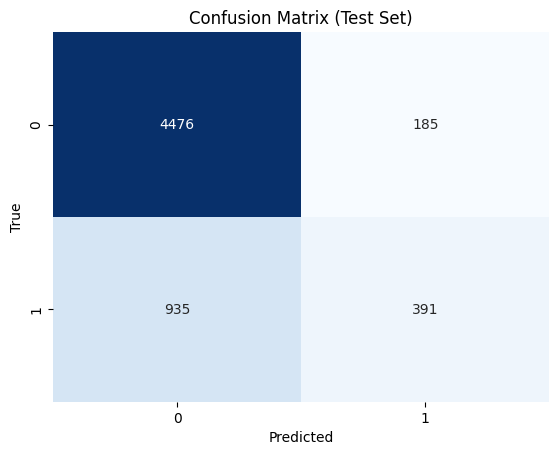

Intercept: -1.4869843521906565

Coefficients:
LIMIT_BAL: -1.7264749248804423
AGE: 0.35038219545000665
EDUCATION: -0.2205137322756486
MARRIAGE: -0.23015238531052273
PAY_1: 6.938217821757661
PAY_2: 0.5827794416117589
PAY_3: 0.8909403183075594
PAY_4: 0.7157140929115425
PAY_5: 0.675643090633199
PAY_6: 1.345187208098819
PAY_AMT1: -2.335603652156856
PAY_AMT2: -1.7683368348185808
PAY_AMT3: -1.4360916288008136
PAY_AMT4: -1.255001455425993
PAY_AMT5: -1.3087987868064697
PAY_AMT6: -1.123882541984316


In [15]:
# Create a Logistic regression
lr_model_cv = LogisticRegression(random_state=42)

# Perform cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Make predictions using cross-validation
y_pred_cv2 = cross_val_predict(lr_model_cv, X_train, y_train, cv=stratified_kfold)

# Fit logistic regression model using statsmodels
logreg_model = sm.Logit(y_train, X_train)
result = logreg_model.fit()

# Display model summary
print(result.summary())


# Calculate metrics on the training set
accuracy_lr_cv = accuracy_score(y_train, y_pred_cv2)
precision_lr_cv = precision_score(y_train, y_pred_cv2)
recall_lr_cv = recall_score(y_train, y_pred_cv2)
f1_lr_cv = f1_score(y_train, y_pred_cv2)

# Print metrics
print("Cross-Validation Metrics:")
print(f"Accuracy: {accuracy_lr_cv:.4f}")
print(f"Precision: {precision_lr_cv:.4f}")
print(f"Recall: {recall_lr_cv:.4f}")
print(f"F1 Score: {f1_lr_cv:.4f}")

# Plot confusion matrix
conf_matrix_lr_cv = confusion_matrix(y_train, y_pred_cv2)
sns.heatmap(conf_matrix_lr_cv, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Cross-Validation)')
plt.show()

# Train the model on the entire training set and make predictions on the test set
lr_model_cv.fit(X_train, y_train)
y_pred_test2 = lr_model_cv.predict(X_test)

# Calculate metrics on the test set
accuracy_test_lr_cv = accuracy_score(y_test, y_pred_test2)
precision_test_lr_cv = precision_score(y_test, y_pred_test2)
recall_test_lr_cv = recall_score(y_test, y_pred_test2)
f1_test_lr_cv = f1_score(y_test, y_pred_test2)

# Print test set metrics
print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy_test_lr_cv:.4f}")
print(f"Precision: {precision_test_lr_cv:.4f}")
print(f"Recall: {recall_test_lr_cv:.4f}")
print(f"F1 Score: {f1_test_lr_cv:.4f}")

# Plot confusion matrix for the test set
conf_matrix_test_lr_cv = confusion_matrix(y_test, y_pred_test2)
sns.heatmap(conf_matrix_test_lr_cv, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Get the coefficients (factors) and intercept
coefficients = lr_model_cv.coef_[0]
intercept = lr_model_cv.intercept_[0]

# Display the coefficients and intercept
print("Intercept:", intercept)
print("\nCoefficients:")
for feature, coefficient in zip(X.columns, coefficients):
    print(f"{feature}: {coefficient}")

4.5.4 Comparison of models based on Train set and test set

In [16]:
comparison_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Decision Tree': [accuracy_dt_cv, precision_dt_cv, recall_dt_cv, f1_dt_cv],
    'SVM': [accuracy_svc_cv, precision_svc_cv, recall_svc_cv, f1_svc_cv],
    'Logistic Regression': [accuracy_lr_cv, precision_lr_cv, recall_lr_cv, f1_lr_cv]
})

# Display the comparison table
print(comparison_table)


comparison_table1= pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Decision Tree': [accuracy_test_dt_cv, precision_test_dt_cv, recall_test_dt_cv, f1_test_dt_cv],
    'SVM': [accuracy_test_svc_cv, precision_test_svc_cv, recall_test_svc_cv, f1_test_svc_cv],
    'Logistic Regression': [accuracy_test_lr_cv, precision_test_lr_cv, recall_test_lr_cv, f1_test_lr_cv]
})

# Display the comparison table
print(comparison_table1)



      Metric  Decision Tree       SVM  Logistic Regression
0   Accuracy       0.722447  0.820505             0.817373
1  Precision       0.383086  0.680014             0.686549
2     Recall       0.414138  0.358530             0.323280
3   F1 Score       0.398007  0.469514             0.439575
      Metric  Decision Tree       SVM  Logistic Regression
0   Accuracy       0.724737  0.814598             0.812928
1  Precision       0.383333  0.658358             0.678819
2     Recall       0.398944  0.338612             0.294872
3   F1 Score       0.390983  0.447211             0.411146
